**1-** First, add all the necessary libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, accuracy_score

**2-** I uploaded 'penguins_size.csv' data set to colab.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


**3-** Load it into pandas dataframe and test it full scale to see if everything is okay

In [6]:
penguins_size = pd.read_csv('penguins_size.csv')
penguins_size

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


**4-** Getting info on data to see if there is missing values.

In [7]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**5-** Basic statistics for numeric columns to understand ranges and central tendencies

In [8]:
penguins_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**6-** Scatterplot to visualize relatioships between numeric features

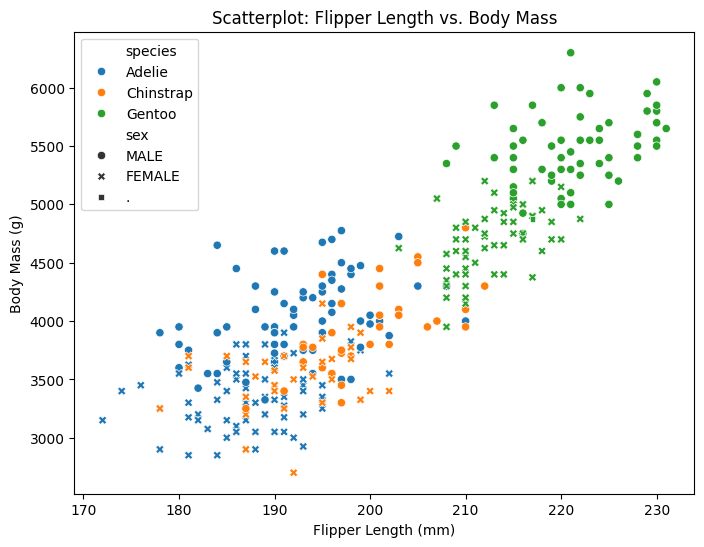

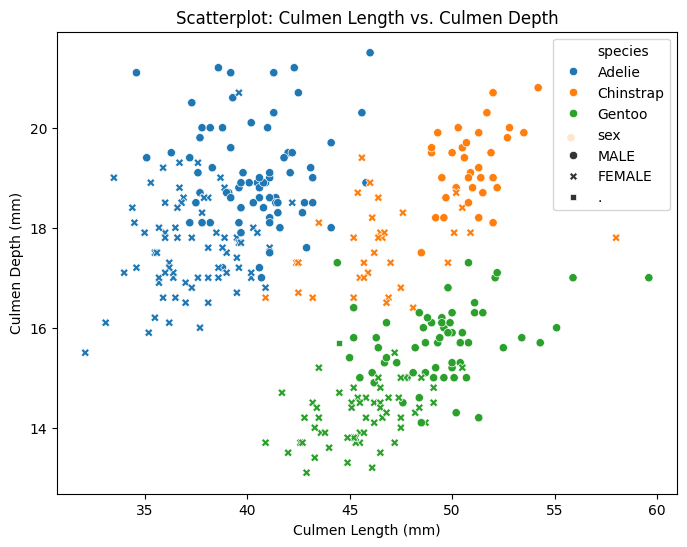

In [9]:
#flipper length - body Mass
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins_size,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    style="sex"
)
plt.title("Scatterplot: Flipper Length vs. Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

#culmen Length - culmen depth
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins_size,
    x="culmen_length_mm",
    y="culmen_depth_mm",
    hue="species",
    style="sex"
)
plt.title("Scatterplot: Culmen Length vs. Culmen Depth")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.show()

**7-** Compare numeric features across species using boxplots; highlight differences in distributions and detect any outliers

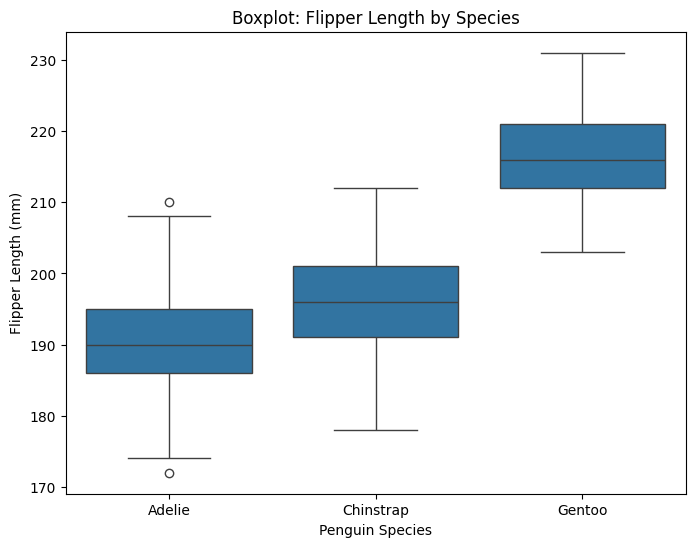

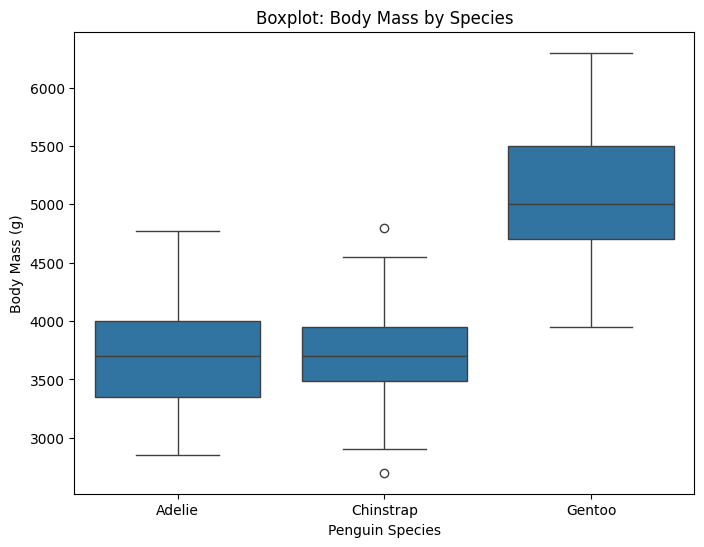

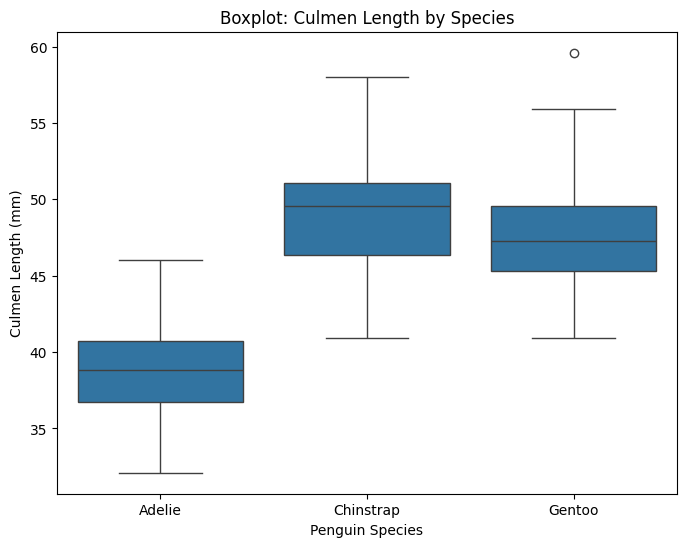

In [10]:
# Flipper length by species
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins_size, x="species", y="flipper_length_mm")
plt.title("Boxplot: Flipper Length by Species")
plt.xlabel("Penguin Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

#body mas by species
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins_size, x="species", y="body_mass_g")
plt.title("Boxplot: Body Mass by Species")
plt.xlabel("Penguin Species")
plt.ylabel("Body Mass (g)")
plt.show()

#culmen length by species
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins_size, x="species", y="culmen_length_mm")
plt.title("Boxplot: Culmen Length by Species")
plt.xlabel("Penguin Species")
plt.ylabel("Culmen Length (mm)")
plt.show()

**8-** It visualize relationships between all numeric features; analyze separability and patterns between species using multiple features

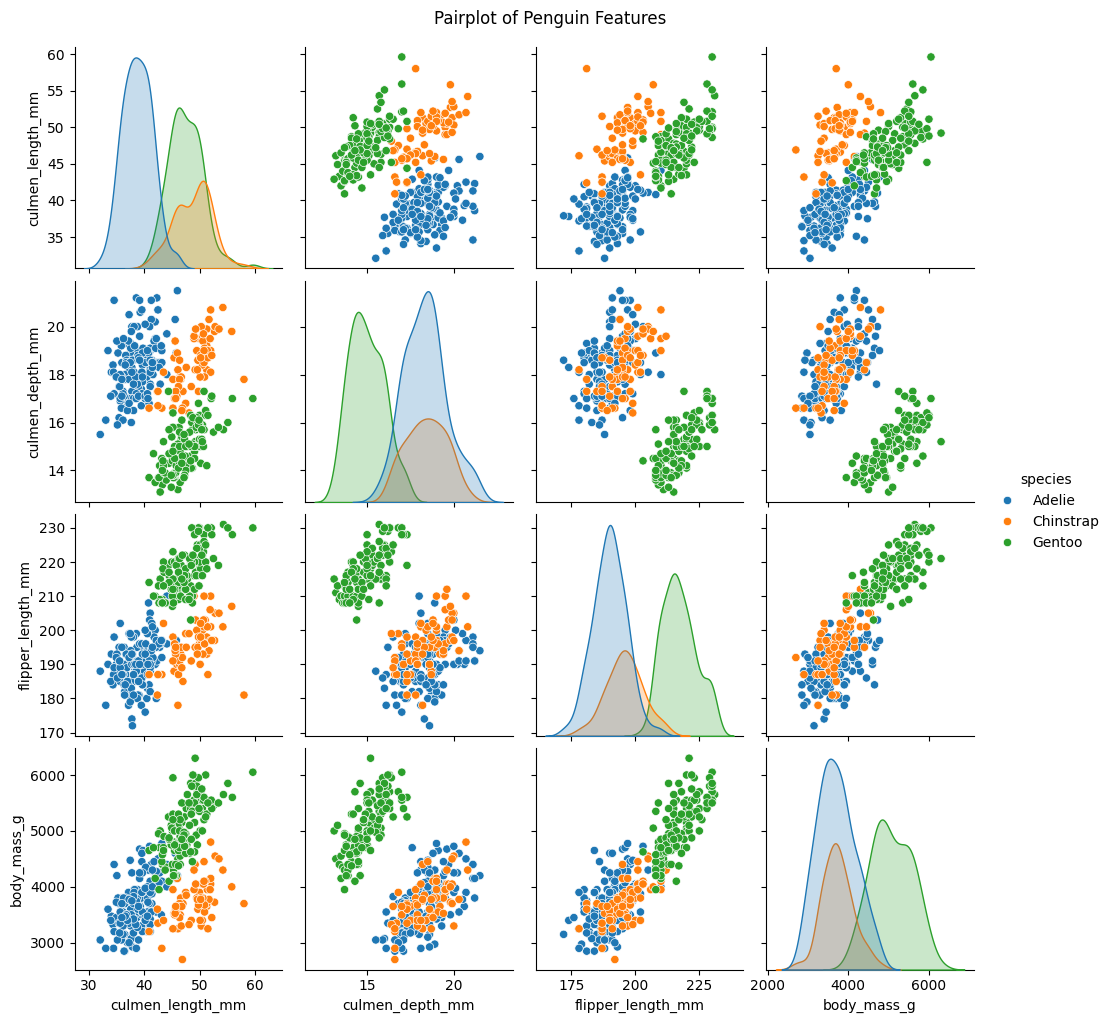

In [11]:
sns.pairplot(
    data=penguins_size,
    hue="species",
    vars=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"],
    diag_kind="kde",
    kind="scatter"
)
plt.suptitle("Pairplot of Penguin Features", y=1.02)
plt.show()

**9-** analyzing missing values in the data set using heatmap and print the conunt of missing values in eac column

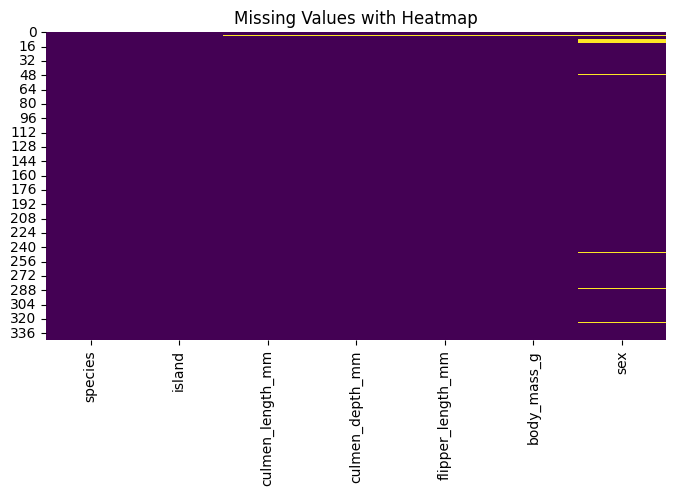

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [12]:
plt.figure(figsize=(8, 4))
sns.heatmap(penguins_size.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values with Heatmap")
plt.show()

penguins_size.isnull().sum()

**10-** after analysing everything, now I try to fill missing values.


1.   Fills the missing numeric values with their column means
2.   Drops rows where the 'sex' is missing
3.   Verify that there are no more missing values

In [13]:
numeric_columns = penguins_size.select_dtypes(include=['float64', 'int64']).columns
penguins_size[numeric_columns] = penguins_size[numeric_columns].fillna(penguins_size[numeric_columns].mean())

penguins_size.dropna(subset=['sex'], inplace=True)

penguins_size.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


**11-** Encoding categorcal features into numeric values. Also this way I prepare data for machine learning models that require numeric imputs.

In [14]:
# for species
species_encoder = LabelEncoder()
penguins_size['species_encoded'] = species_encoder.fit_transform(penguins_size['species'])

# for island and sex
island_encoder = LabelEncoder()
penguins_size['island_encoded'] = island_encoder.fit_transform(penguins_size['island'])

sex_encoder = LabelEncoder()
penguins_size['sex_encoded'] = sex_encoder.fit_transform(penguins_size['sex'])

penguins_size.drop(columns=['species', 'island', 'sex'], inplace=True)

penguins_size.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
0,39.1,18.7,181.0,3750.0,0,2,2
1,39.5,17.4,186.0,3800.0,0,2,1
2,40.3,18.0,195.0,3250.0,0,2,1
4,36.7,19.3,193.0,3450.0,0,2,1
5,39.3,20.6,190.0,3650.0,0,2,2


**11-** Using One-Hot encoding to all categorical columns and transform categorical variables into binary columns for machine learning models

In [15]:
penguins_encoded = pd.get_dummies(penguins_size,
                                 columns=['species_encoded', 'island_encoded', 'sex_encoded'],
                                 drop_first=False,
                                 prefix=['species', 'island', 'sex'])

penguins_encoded.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_0,species_1,species_2,island_0,island_1,island_2,sex_0,sex_1,sex_2
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,False,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,False,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,False,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,False,True


**12-** Splitting data and graphically compare train/test accuracy for different values of max_depth

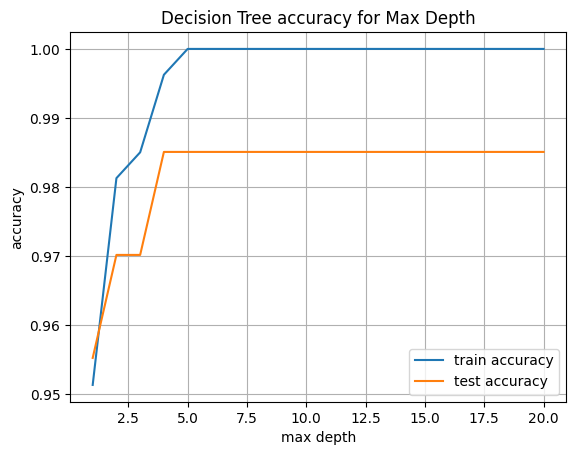

In [16]:
X = penguins_encoded.drop(columns=['species_0'])
y = penguins_encoded['species_0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies_depth = []
test_accuracies_depth = []
max_depth_range = range(1, 21)

for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies_depth.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies_depth.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure()
plt.plot(max_depth_range, train_accuracies_depth, label='train accuracy')
plt.plot(max_depth_range, test_accuracies_depth, label='test accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('Decision Tree accuracy for Max Depth')
plt.legend()
plt.grid()
plt.show()

**13-** compare train-test accuracy for different values of min_samples_split

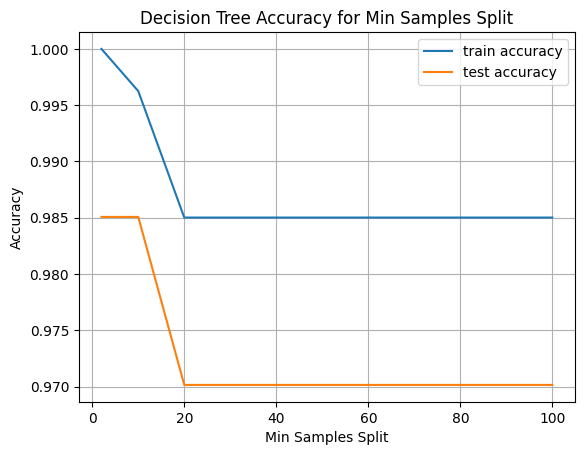

In [17]:
train_accuracies_split = []
test_accuracies_split = []
min_samples_split_range = [2, 10, 20, 50, 100]

for min_split in min_samples_split_range:
    dt = DecisionTreeClassifier(min_samples_split=min_split, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies_split.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies_split.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure()
plt.plot(min_samples_split_range, train_accuracies_split, label='train accuracy')
plt.plot(min_samples_split_range, test_accuracies_split, label='test accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Min Samples Split')
plt.legend()
plt.grid()
plt.show()


**14-** for different values of min_samples_leaf

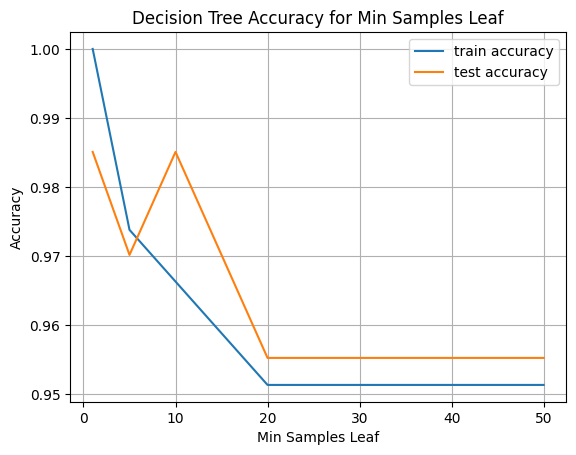

In [18]:
train_accuracies_leaf = []
test_accuracies_leaf = []
min_samples_leaf_range = [1, 5, 10, 20, 50]

for min_leaf in min_samples_leaf_range:
    dt = DecisionTreeClassifier(min_samples_leaf=min_leaf, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies_leaf.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies_leaf.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure()
plt.plot(min_samples_leaf_range, train_accuracies_leaf, label='train accuracy')
plt.plot(min_samples_leaf_range, test_accuracies_leaf, label='test accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Min Samples Leaf')
plt.legend()
plt.grid()
plt.show()

**15-** Appling Grid search on 3 parameters I used to find the best parameters

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9888190076869321


**16-**  final decision tree with the best parameter(max_depht) in grid search

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

best_params = grid_search.best_params_

final_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
final_decision_tree.fit(X_train, y_train)

y_pred = final_decision_tree.predict(X_test)

**16-A** Plot Confusion Matrix for the final model

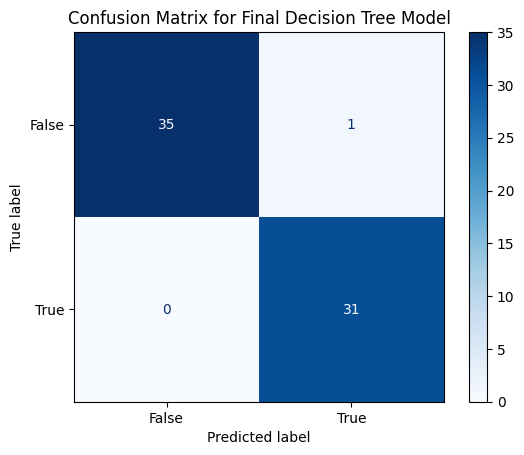

In [21]:
ConfusionMatrixDisplay.from_estimator(final_decision_tree, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Final Decision Tree Model')
plt.show()

**16-B** Classification Report

In [22]:
print("classification report for final decision tree model:")
print(classification_report(y_test, y_pred))

classification report for final decision tree model:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        36
        True       0.97      1.00      0.98        31

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



**16-C My Comments**

The model is good at making correct predictions most of the time, as shown by the accuracy score. We can understand based on precision and recall if the model is balanced in its predictions.

The confusion matrix shows where the model made mistakes. For example, if there are many incorrect predictions in one class, the model may need better training for that specific class.

Overall the model performs well on the test data, but some small errors suggest that the model might still have room for improvement, like tuning more parameters or using more data.

**17-A** Find the best values for the parameter n_estimators using graph method, picking the best parameter(max_depht) I try different approach for this part but I think the data result the one line graph image. So I let it be this way.

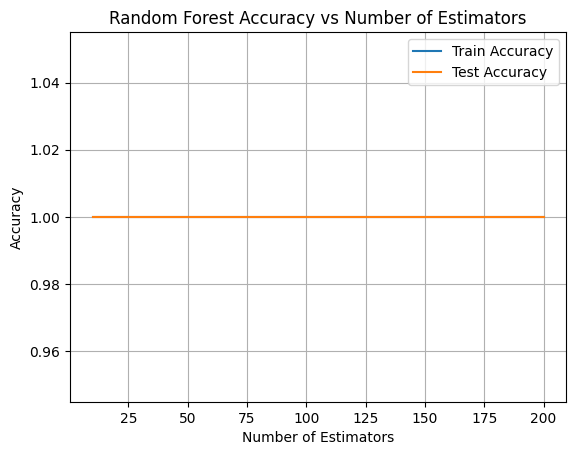

In [32]:
train_accuracies_rf = []
test_accuracies_rf = []
n_estimators_range = range(10, 201, 10)

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_accuracies_rf.append(accuracy_score(y_train, rf.predict(X_train)))
    test_accuracies_rf.append(accuracy_score(y_test, rf.predict(X_test)))

plt.figure()
plt.plot(n_estimators_range, train_accuracies_rf, label='train accuracy')
plt.plot(n_estimators_range, test_accuracies_rf, label='test accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Number of Estimators')
plt.legend()
plt.grid()
plt.show()

**17-B** Build and train the final Random Forest model using the best n_estimators

In [35]:
best_n_estimators = 50

final_rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
final_rf.fit(X_train, y_train)

y_pred_rf = final_rf.predict(X_test)

**17-C** Plot the confusion matrix and generate the classification report for the final Random Forest model

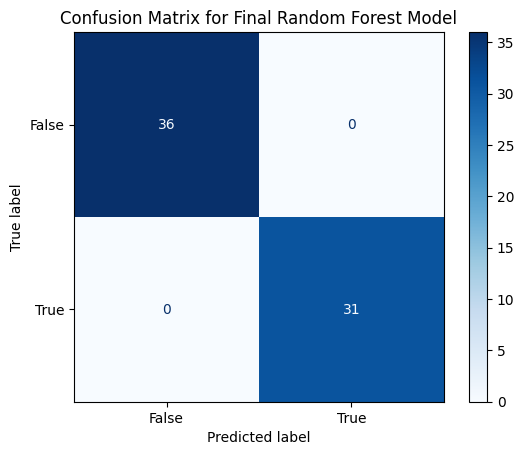

Classification Report for Final Random Forest Model:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        31

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [37]:
ConfusionMatrixDisplay.from_estimator(final_rf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Final Random Forest Model')
plt.show()

print("Classification Report for Final Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

**17-D** I compared both models bottom to top and add my final comments down below

Decision Tree Accuracy: 0.9851
Random Forest Accuracy: 1.0000
Confusion Matrix for Decision Tree:


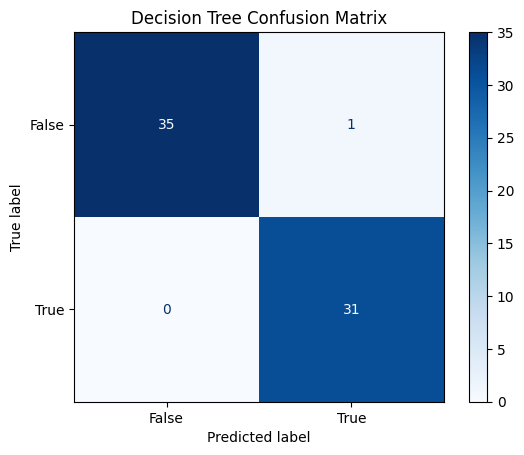

Confusion Matrix for Random Forest:


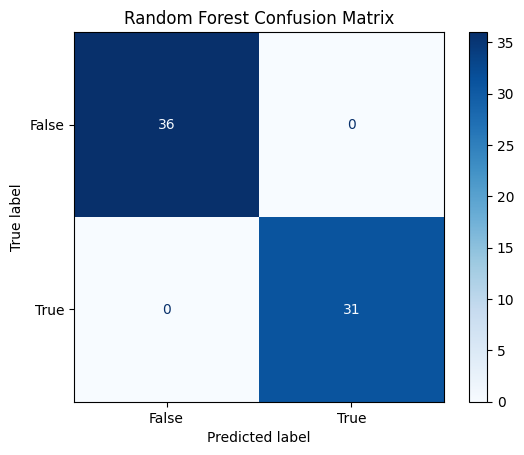

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        36
        True       0.97      1.00      0.98        31

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        31

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [39]:
y_pred_dt = final_decision_tree.predict(X_test)
y_pred_rf = final_rf.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("Confusion Matrix for Decision Tree:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Confusion Matrix for Random Forest:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

**Final Comments:** The Random Forest model is better than the Decision Tree because it is more accurate and makes fewer mistakes.

In the confusion matrix, Random Forest has fewer errors compared to the Decision Tree, so it predicts better.
The Random Forest model has higher scores for precision, recall, and F1, which means it predicts all classes more evenly and correctly.

Decision Tree is faster but not as reliable because it depends on one tree, and sometimes it overfits or misses some patterns.

Random Forest combines many trees, so it’s more stable and works better for test data.

**Hope I did fine 😀**